In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


---
# Algebraic and geometric interpretations
---


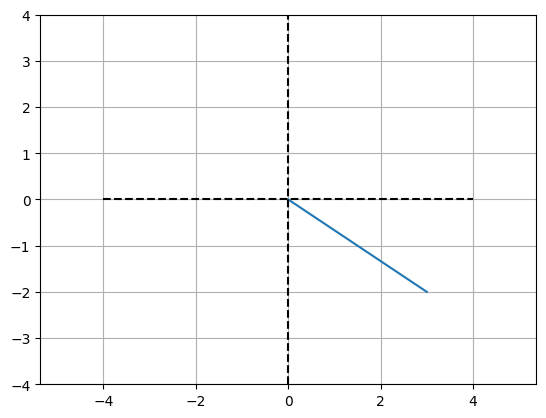

In [3]:

# 2-dimensional vector
v2 = [ 3, -2 ]

# plot them
plt.plot([0,v2[0]],[0,v2[1]])
plt.axis('equal')
plt.plot([-4, 4],[0, 0],'k--')
plt.plot([0, 0],[-4, 4],'k--')
plt.grid()
plt.axis((-4, 4, -4, 4))
plt.show()




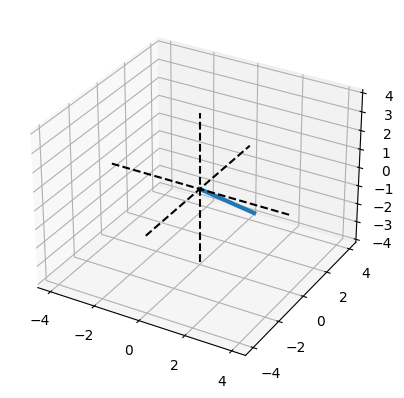

In [4]:
# 3-dimensional vector
v3 = [ 4, -3, 2 ]

# row to column (or vice-versa):
v3t = np.transpose(v3)
# plot the 3D vector
fig = plt.figure(figsize=plt.figaspect(1))
ax = plt.axes(None, projection='3d')
ax.plot([0, v3[0]],[0, v3[1]],[0, v3[2]],linewidth=3)

# make the plot look nicer
ax.plot([0, 0],[0, 0],[-4, 4],'k--')
ax.plot([0, 0],[-4, 4],[0, 0],'k--')
ax.plot([-4, 4],[0, 0],[0, 0],'k--')
plt.show()


---
# Vector addition/subtraction
---


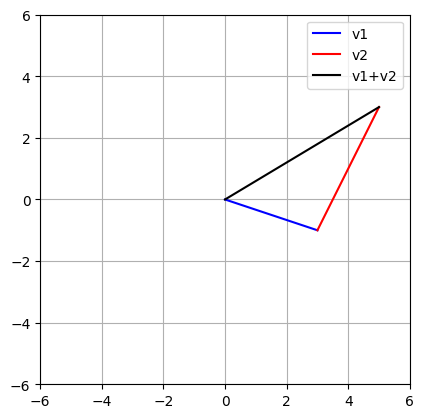

In [5]:
# two vectors in R2
v1 = np.array([ 3, -1 ])
v2 = np.array([ 2,  4 ])

v3 = v1 + v2


# plot them
plt.plot([0, v1[0]],[0, v1[1]],'b',label='v1')
plt.plot([0, v2[0]]+v1[0],[0, v2[1]]+v1[1],'r',label='v2')
plt.plot([0, v3[0]],[0, v3[1]],'k',label='v1+v2')

plt.legend()
plt.axis('square')
plt.axis((-6, 6, -6, 6 ))
plt.grid()
plt.show()



---
#  Vector-scalar multiplication
---


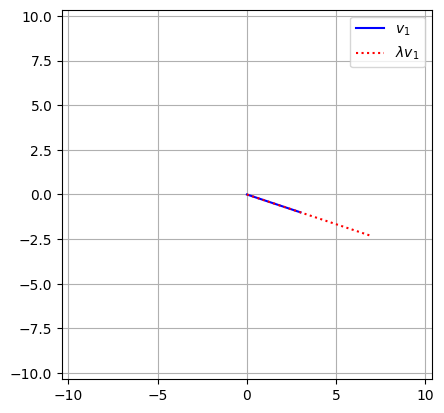

In [6]:
# vector and scalar
v1 = np.array([ 3, -1 ])
l  = 2.3
v1m = v1*l # scalar-modulated

# plot them
plt.plot([0, v1[0]],[0, v1[1]],'b',label='$v_1$')
plt.plot([0, v1m[0]],[0, v1m[1]],'r:',label='$\lambda v_1$')

plt.legend()
plt.axis('square')
axlim = max([max(abs(v1)),max(abs(v1m))])*1.5 # dynamic axis lim
plt.axis((-axlim,axlim,-axlim,axlim))
plt.grid()
plt.show()


---
#  Vector-vector multiplication: the dot product
---


In [8]:
## many ways to compute the dot product

v1 = np.array([ 1, 2, 3, 4, 5, 6 ])
v2 = np.array([ 0, -4,  -3, 6, 5, 8 ])

# method 1
dp1 = sum( np.multiply(v1,v2) )

# method 2
dp2 = np.dot( v1,v2 )

# method 3
dp3 = np.matmul( v1.T,v2 )

# method 4
dp4 = 0  # initialize

# loop over elements
for i in range(len(v1)):
    
    # multiply corresponding element and sum
    dp4 = dp4 + v1[i]*v2[i]


print(dp1,dp2,dp3,dp4)

80 80 80 80


In [9]:
v1

array([1, 2, 3, 4, 5, 6])

#  Dot product properties: associative and distributive

In [10]:
## Distributive property

# create random vectors
n = 10
a = np.random.randn(n)
b = np.random.randn(n)
c = np.random.randn(n)

# the two results
res1 = np.dot( a , (b+c) )
res2 = np.dot(a,b) + np.dot(a,c)

# compare them
print([ res1,res2 ])

[-0.63560215635206, -0.6356021563520595]


In [11]:
## Associative property

# create random vectors
n = 5
a = np.random.randn(n)
b = np.random.randn(n)
c = np.random.randn(n)

# the two results
res1 = np.dot( a , np.dot(b,c) )
res2 = np.dot( np.dot(a,b) , c )

# compare them
print(res1)
print(res2)


### special cases where associative property works!
# 1) one vector is the zeros vector
# 2) a==b==c


[ 1.05683656  0.00826278  0.65874189 -0.24094237  0.5813397 ]
[ 0.72108228 -0.22803627  0.38765091  1.04223428 -0.48066901]



---
# Vector length
---


In [12]:
# a vector
v1 = np.array([ 1, 2, 3, 4, 5, 6 ])

# methods 1-4, just like with the regular dot product, e.g.:
vl1 = np.sqrt( sum( np.multiply(v1,v1)) )
vl3 = np.sqrt(np.dot(v1,v1))
# method 5: take the norm
vl2 = np.linalg.norm(v1)

print(vl1,vl2,vl3)

9.539392014169456 9.539392014169456 9.539392014169456



---
# The dot product from a geometric perspective
---


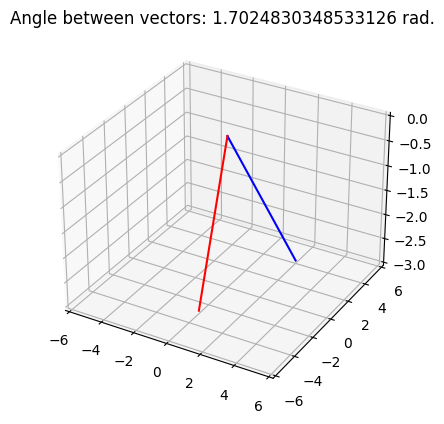

In [14]:

# two vectors
v1 = np.array([ 2,  4, -3 ])
v2 = np.array([ 0, -3, -3 ])

# compute the angle (radians) between two vectors
ang = np.arccos( np.dot(v1,v2) / (np.linalg.norm(v1)*np.linalg.norm(v2)) )


# draw them

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.plot([0, v1[0]],[0, v1[1]],[0, v1[2]],'b')
ax.plot([0, v2[0]],[0, v2[1]],[0, v2[2]],'r')

plt.axis((-6, 6, -6, 6))
plt.title('Angle between vectors: %s rad.' %ang)
plt.show()


In [10]:
## equivalence of algebraic and geometric dot product formulas

# two vectors
v1 = np.array([ 2,  4, -3 ])
v2 = np.array([ 0, -3, -3 ])


# algebraic
dp_a = np.dot( v1,v2 )

# geometric
dp_g = np.linalg.norm(v1)*np.linalg.norm(v2)*np.cos(ang)

# print dot product to command
print(dp_a)
print(dp_g)


-3
-3.0000000000000013


In [11]:
x = [ 16, -2, 4 ]
t = [ .5, 2, -1 ]

np.dot(x,t)

0.0


---
#  Vector Hadamard multiplication
---


In [12]:

# create vectors
w1 = [ 1, 3, 5 ]
w2 = [ 3, 4, 2 ]

w3 = np.multiply(w1,w2)
print(w3)


[ 3 12 10]



---
#  Vector outer product
---


In [19]:

v1 = np.array([  1, 2, 3 ])
v2 = np.array([ -1, 0, 1 ])

# outer product
print(np.outer(v1,v2))
print("----------------")
# terrible programming, but helps conceptually:
op = np.zeros((len(v1),len(v2)))
for i in range(0,len(v1)):
    for j in range(0,len(v2)):
        op[i,j] = v1[i] * v2[j]

print(op)

[[-1  0  1]
 [-2  0  2]
 [-3  0  3]]
----------------
[[-1.  0.  1.]
 [-2.  0.  2.]
 [-3.  0.  3.]]



---
# Vector cross product
---


[15 20  1] [[15], [20], [1]]


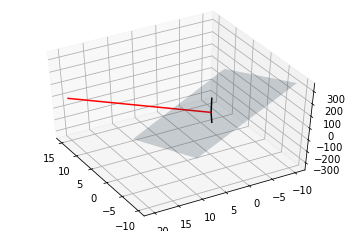

In [16]:
# create vectors
v1  = [ -3,  2, 5 ]
v2  = [  4, -3, 0 ]

# Python's cross-product function
v3a = np.cross( v1,v2 )

# "manual" method
v3b = [ [v1[1]*v2[2] - v1[2]*v2[1]],
        [v1[2]*v2[0] - v1[0]*v2[2]],
        [v1[0]*v2[1] - v1[1]*v2[0]] ]

print(v3a,v3b)


fig = plt.figure()
ax = fig.gca(projection='3d')

# draw plane defined by span of v1 and v2
xx, yy = np.meshgrid(np.linspace(-10,10,10),np.linspace(-10,10,10))
z1 = (-v3a[0]*xx - v3a[1]*yy)/v3a[2]
ax.plot_surface(xx,yy,z1,alpha=.2)

## plot the two vectors
ax.plot([0, v1[0]],[0, v1[1]],[0, v1[2]],'k')
ax.plot([0, v2[0]],[0, v2[1]],[0, v2[2]],'k')
ax.plot([0, v3a[0]],[0, v3a[1]],[0, v3a[2]],'r')


ax.view_init(azim=150,elev=45)
plt.show()


---
#  Hermitian transpose (a.k.a. conjugate transpose)
---


In [17]:
# create a complex number
z = np.complex(3,4)

# magnitude
print( np.linalg.norm(z) )

# by transpose?
print( np.transpose(z)*z )

# by Hermitian transpose
print( np.transpose(z.conjugate())*z )


# complex vector
v = np.array( [ 3, 4j, 5+2j, np.complex(2,-5) ] )
print( v.T )
print( np.transpose(v) )
print( np.transpose(v.conjugate()) )

5.0
(-7+24j)
(25+0j)
[3.+0.j 0.+4.j 5.+2.j 2.-5.j]
[3.+0.j 0.+4.j 5.+2.j 2.-5.j]
[3.-0.j 0.-4.j 5.-2.j 2.+5.j]



---
#  Unit vector
---


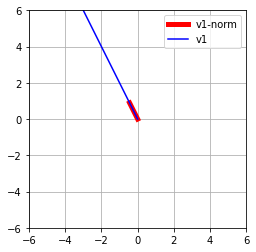

In [18]:
# vector
v1 = np.array([ -3, 6 ])

# mu
mu = 1/np.linalg.norm(v1)

v1n = v1*mu

# plot them
plt.plot([0, v1n[0]],[0, v1n[1]],'r',label='v1-norm',linewidth=5)
plt.plot([0, v1[0]],[0, v1[1]],'b',label='v1')

# axis square
plt.axis('square')
plt.axis(( -6, 6, -6, 6 ))
plt.grid()
plt.legend()
plt.show()


---
#  Span
---


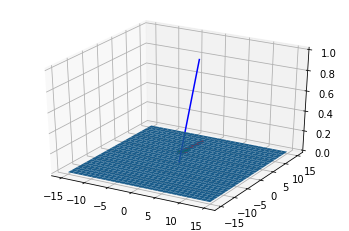

In [19]:
# set S
S1 = np.array([1, 1, 0])
S2 = np.array([1, 7, 0])

# vectors v and w
v = np.array([1, 2, 0])
w = np.array([3, 2, 1])

# draw vectors
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot([0, S1[0]],[0, S1[1]],[.1, S1[2]+.1],'r',linewidth=3)
ax.plot([0, S2[0]],[0, S2[1]],[.1, S2[2]+.1],'r',linewidth=3)

ax.plot([0, v[0]],[0, v[1]],[.1, v[2]+.1],'g',linewidth=3)
ax.plot([0, w[0]],[0, w[1]],[0, w[2]],'b')

# now draw plane
xx, yy = np.meshgrid(range(-15,16), range(-15,16))
cp = np.cross(S1,S2)
z1 = (-cp[0]*xx - cp[1]*yy)*1./cp[2]
ax.plot_surface(xx,yy,z1)

plt.show()